In [13]:
import pandas as pd
import numpy as np

import pyLDAvis.sklearn
from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/kalaimano/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/kalaimano/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [26]:
df = pd.read_csv("Resources/okcupid_google_play_reviews.csv")

In [27]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGdJrE-9mbNWNotCFj5MAmzX7dLlmlIYVLp0ng...,Laurent,https://play-lh.googleusercontent.com/a-/AOh14...,"Nothing is really done to tackle fake profile,...",1,0,8.6.5,2022-03-26 22:45:24,NaN,NaN
1,gp:AOqpTOGkscl5iYhHB3EVP6ntGwao8kOoyVfukuf4OmW...,Dawn McCord,https://play-lh.googleusercontent.com/a-/AOh14...,OkCupid used to be a genuinely good dating sit...,1,0,NaN,2022-03-26 22:32:25,NaN,NaN
2,gp:AOqpTOHdwEJHi1a8Bt0ZfC-_5WdgPbg03CVUKWCS2o5...,Kyle Mann,https://play-lh.googleusercontent.com/a-/AOh14...,Met a bunch of bots. Then got banned. Don't th...,1,0,NaN,2022-03-26 20:49:15,NaN,NaN
3,gp:AOqpTOFG4b5h6CmnDOc2WDYpi1DmEJqZOycswiIJQ9i...,Nix Taylor,https://play-lh.googleusercontent.com/a-/AOh14...,Nearly every girl on this app changed their lo...,1,0,63.2.0,2022-03-26 18:51:39,NaN,NaN
4,gp:AOqpTOHOiFSwR89mgZYRT5lZ1w8vhjM00kk_Zjv5t0e...,Jonathon Horner,https://play-lh.googleusercontent.com/a-/AOh14...,When I opted to pay for premium they were more...,2,1,57.1.1,2022-03-26 18:01:22,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127276 entries, 0 to 127275
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              127276 non-null  object
 1   userName              127276 non-null  object
 2   userImage             127276 non-null  object
 3   content               126857 non-null  object
 4   score                 127276 non-null  int64 
 5   thumbsUpCount         127276 non-null  int64 
 6   reviewCreatedVersion  110229 non-null  object
 7   at                    127276 non-null  object
 8   replyContent          9066 non-null    object
 9   repliedAt             9066 non-null    object
dtypes: int64(2), object(8)
memory usage: 9.7+ MB


In [29]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [30]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='cividis',low =0.2,high=0.1) 

,Null Values,% Missing Values
content,419,0.329206
reviewCreatedVersion,17047,13.393727
replyContent,118210,92.876897
repliedAt,118210,92.876897


/Users/kalaimano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

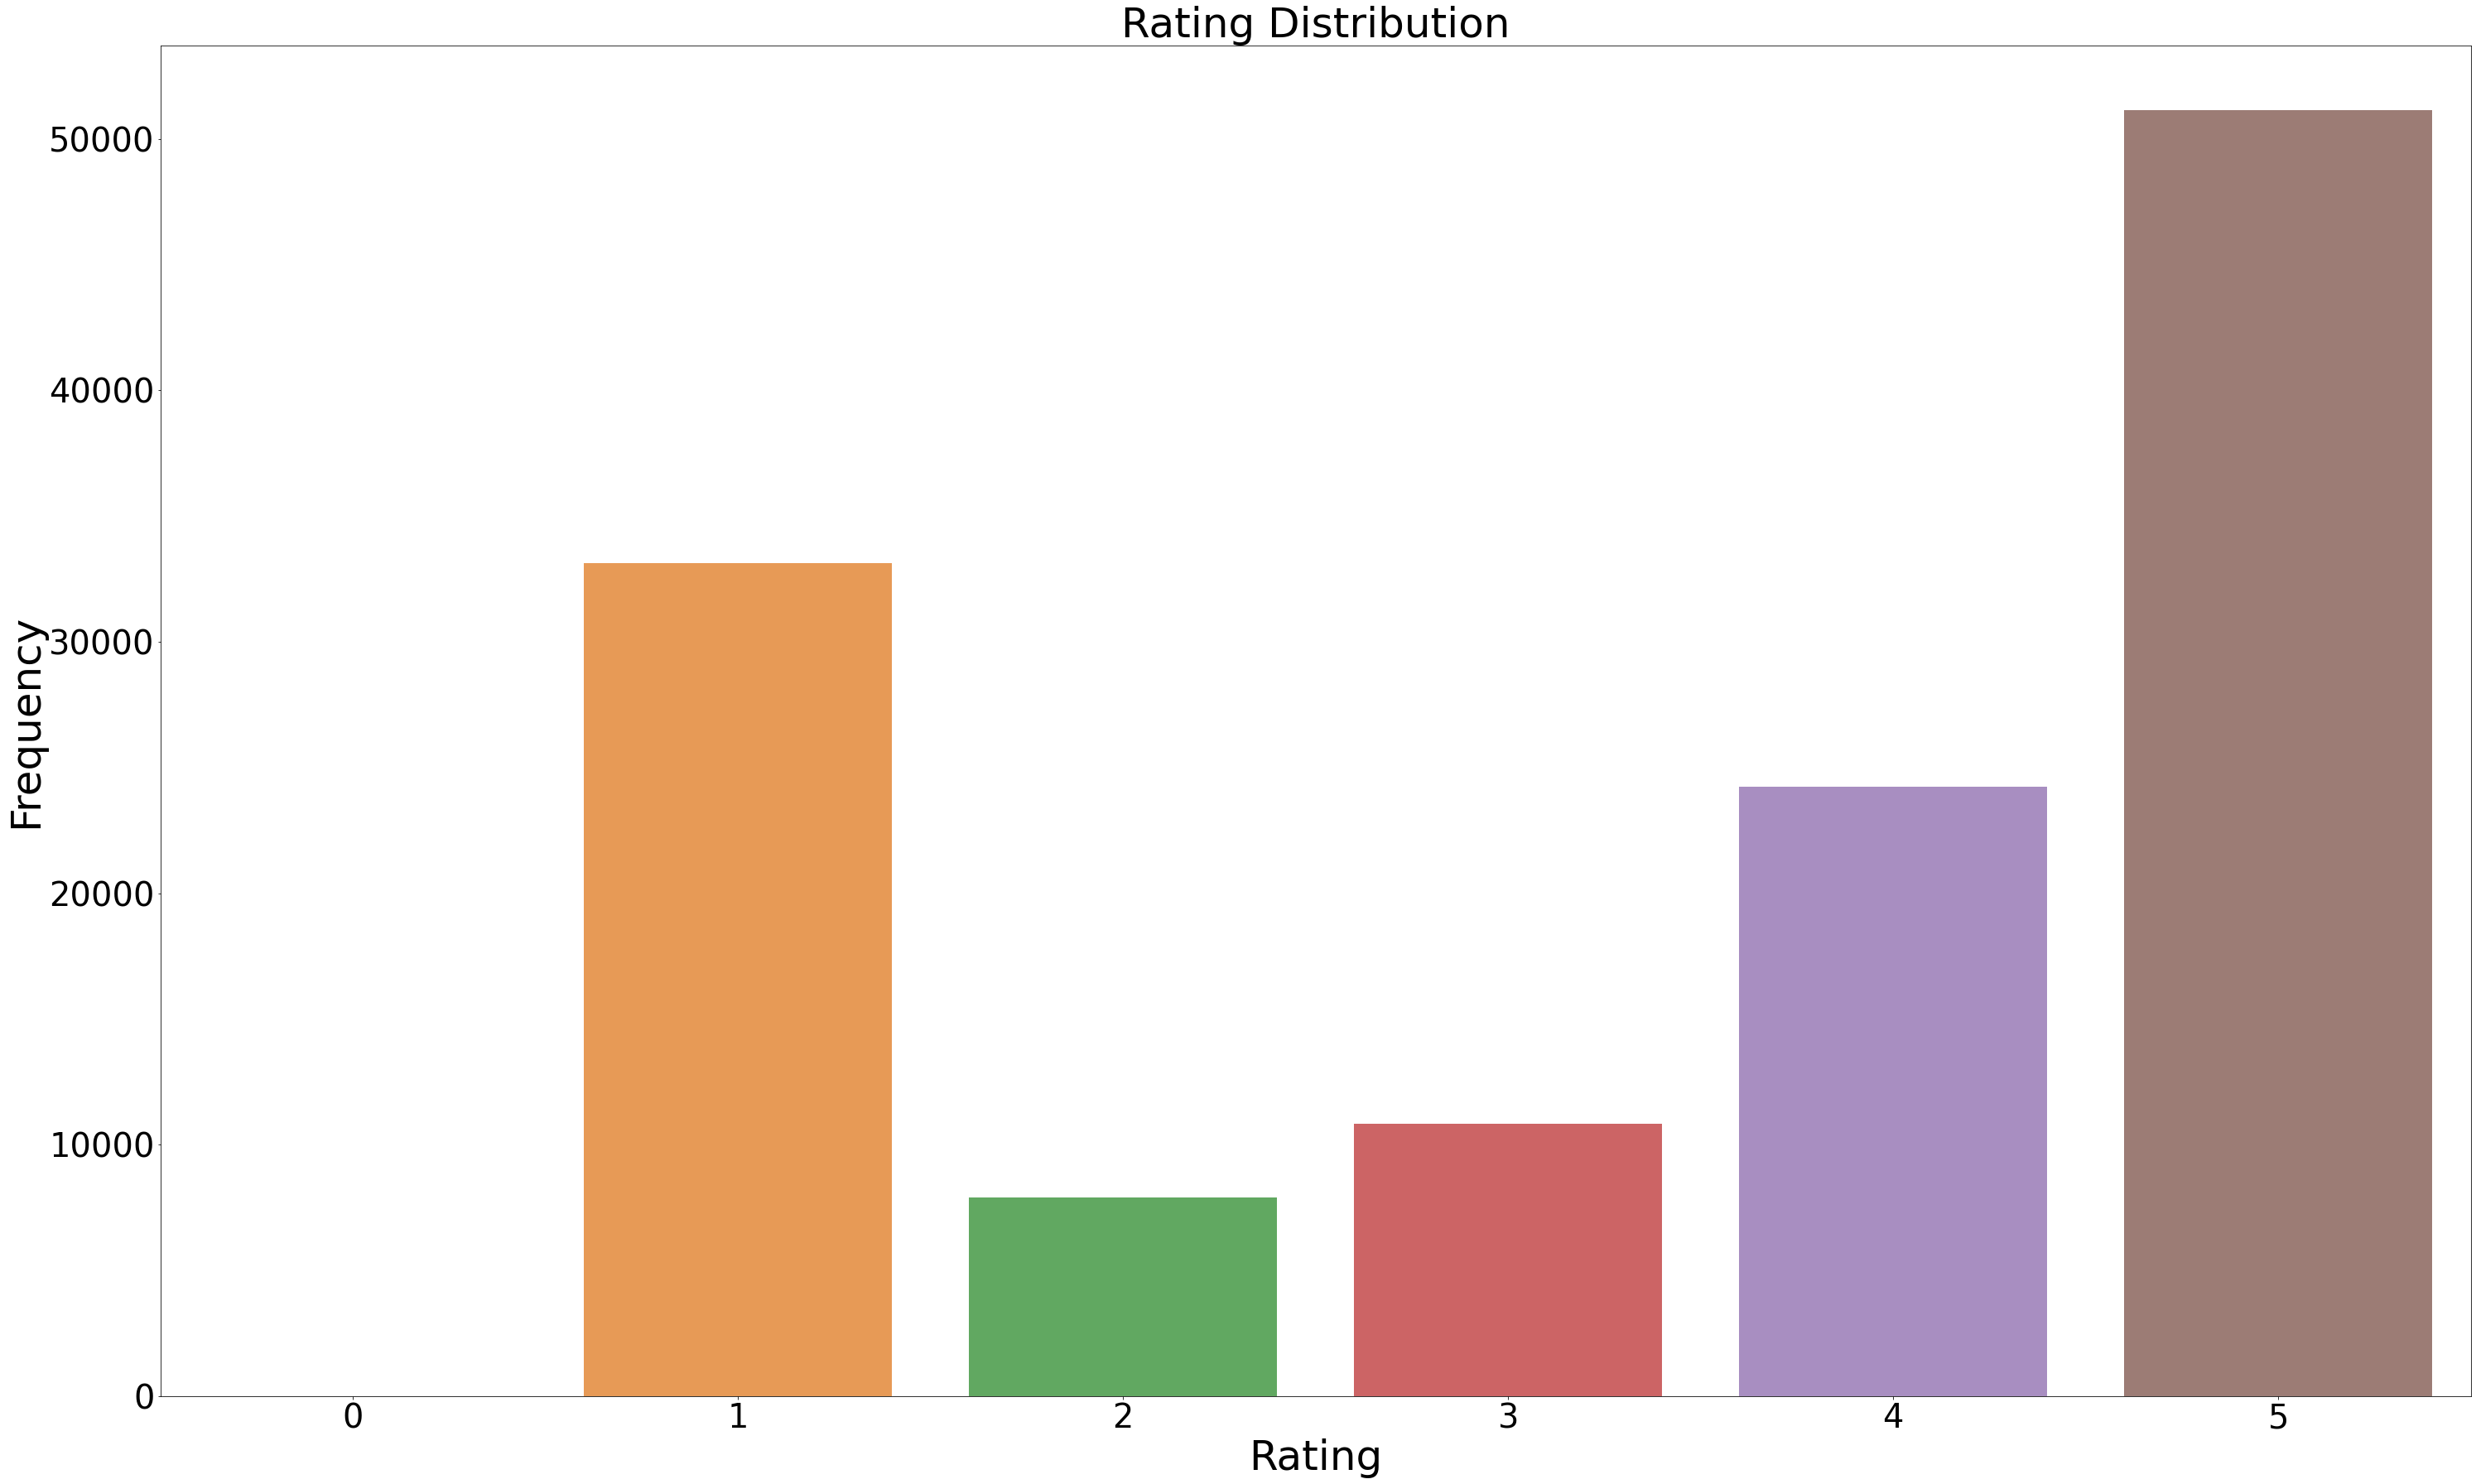

In [31]:
x_axis = df.score.value_counts()
y_axis = x_axis.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_axis.index, x_axis.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Rating', fontsize=50)
plt.xticks(fontsize=40)

<AxesSubplot:title={'center':'Percentage of Ratings/Score'}, ylabel='score'>

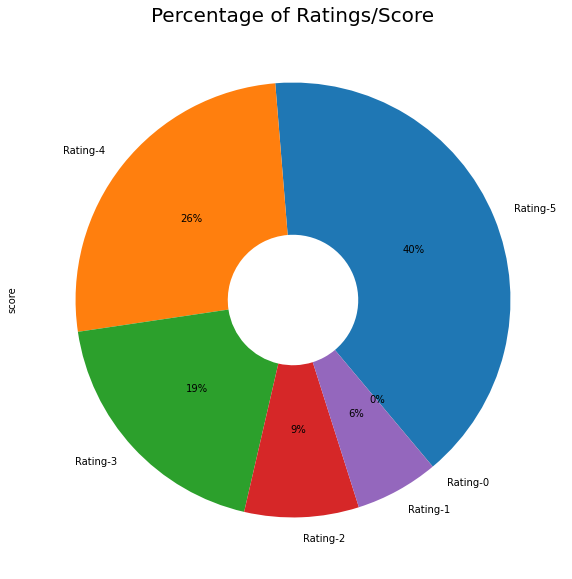

In [33]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings/Score', fontsize=20)
df.score.value_counts().plot(kind='pie', labels=['Rating-5', 'Rating-4', 'Rating-3', 'Rating-2', 'Rating-1', 'Rating-0'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -50, 
                              textprops={'fontsize': 10})